# Demo No. 6 - Producing synthetic light curves

This demo will finally provide a quick guide trough a process of generating a light curve.

## Defining a binary system

Initially, we will define a binary model as usual:

In [1]:
# %matplotlib notebook
%matplotlib widget
from astropy import units as u

from elisa import BinarySystem
from elisa import Star

from elisa import settings

primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=5,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=85 * u.deg,
    distance=155*u.pc, 
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

/home/miro/elisa/jupyter_tutorials/elisa/conf/settings.py:395: DeprecationWarning: Variable `atlas` in configuration section `support` is not longer supported and will be removed in future version.
Use atmosphere definition as initial parameter for given celestial object
  warnings.warn("Variable `atlas` in configuration section `support` is not "


2022-06-01 17:06:08,538 - 260062 - binary_system.system - INFO: initialising object BinarySystem
2022-06-01 17:06:08,574 - 260062 - binary_system.system - INFO: setting discretization factor of secondary component to 8.00 according to discretization factor of the companion.


## Defining observer class instance

In order to be able to specify observer-dependent parameters of the light curve such as passband we have to define `Observer` class: 

In [2]:
from elisa import Observer

o = Observer(passband=[  # defining passbands at which calculate a light curve
#     'Generic.Bessell.U',
    'Generic.Bessell.B',
    'Generic.Bessell.V',
    'Generic.Bessell.R',
    'Generic.Bessell.I',
                      ],
             system=bs)  # specifying the binary system to use in light curve synthesis

2022-06-01 17:06:08,581 - 260062 - observer.observer - INFO: initialising Observer instance


List of all available passbands can be found here:

In [3]:
settings.PASSBANDS

['bolometric',
 'Generic.Bessell.U',
 'Generic.Bessell.B',
 'Generic.Bessell.V',
 'Generic.Bessell.R',
 'Generic.Bessell.I',
 'SLOAN.SDSS.u',
 'SLOAN.SDSS.g',
 'SLOAN.SDSS.r',
 'SLOAN.SDSS.i',
 'SLOAN.SDSS.z',
 'Generic.Stromgren.u',
 'Generic.Stromgren.v',
 'Generic.Stromgren.b',
 'Generic.Stromgren.y',
 'Kepler',
 'Gaia.2010.G',
 'Gaia.2010.BP',
 'Gaia.2010.RP',
 'TESS']

`Observer` enables to perform ''observations''. Synthetic light curve of our binary system can be produced using function on our `Observer` class instance: 

In [4]:
phases, fluxes = o.observe.lc(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
    # normalize=True
)

2022-06-01 17:06:08,620 - 260062 - observer.observer - INFO: observation is running
2022-06-01 17:06:09,871 - 260062 - observer.observer - INFO: observation finished


This function (and its short equivalent o.lc()) returns `phases` in which synthetic light curves were produced and `curves` dictionary with synthetic light curves for every passband specifyied in `observer` class. The default output unit of calculated light curves is $W/m^2$. If you need, however, to produce normalized light curves, you can use additional argument `normalize=True`.

In [5]:
fluxes

{'Generic.Bessell.B': array([3.34979426e-11, 3.34022412e-11, 3.31822086e-11, 3.27927706e-11,
        3.22839233e-11, 3.17106218e-11, 3.11407708e-11, 3.06463613e-11,
        3.03185673e-11, 3.02482190e-11, 3.02439818e-11, 3.02482190e-11,
        3.03185673e-11, 3.06463613e-11, 3.11407708e-11, 3.17106218e-11,
        3.22839233e-11, 3.27927706e-11, 3.31822086e-11, 3.34022412e-11,
        3.34979426e-11, 3.35997737e-11, 3.37063568e-11, 3.38156159e-11,
        3.39294565e-11, 3.40427125e-11, 3.41549892e-11, 3.42604254e-11,
        3.43656128e-11, 3.44596318e-11, 3.45437695e-11, 3.46185278e-11,
        3.46759921e-11, 3.47190722e-11, 3.47447847e-11, 3.47547675e-11,
        3.47406154e-11, 3.47095345e-11, 3.46586080e-11, 3.45899227e-11,
        3.44996126e-11, 3.43947059e-11, 3.42745561e-11, 3.41375106e-11,
        3.39944968e-11, 3.38393243e-11, 3.36784404e-11, 3.35129635e-11,
        3.33490298e-11, 3.31858185e-11, 3.30267232e-11, 3.28742333e-11,
        3.22256683e-11, 3.10182312e-11, 2.9

## Visualizing the results

Resulting light curves can be visualized very similarly as in the case of `BinarySystem` instance:

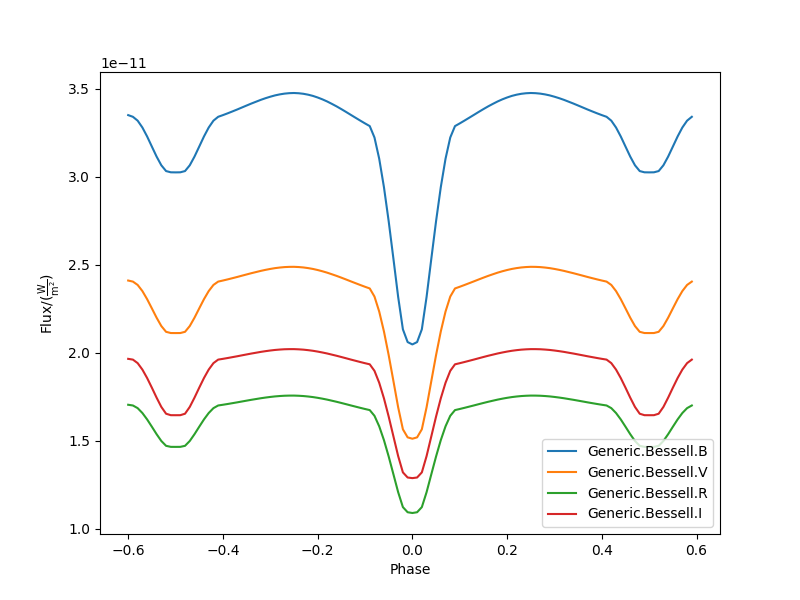

In [6]:
o.plot.phase_curve(phases=phases, fluxes=fluxes)

## Specifying flux unit

Apart from generating light curves in default unit of flux ($W/m^2$), the light curve can be produced also in magnitudes. User can also select from three magnitude systems (`vega`(default), `ab`, `st`) which will be used during conversion of fluxes into magnitudes. 

In [9]:
settings.MAGNITUDE_SYSTEM='vega'
phase, magnitudes = o.observe.lc(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
    flux_unit=u.mag
)

2022-06-01 17:48:22,752 - 260062 - observer.observer - INFO: observation is running
2022-06-01 17:48:23,676 - 260062 - observer.observer - INFO: observation finished


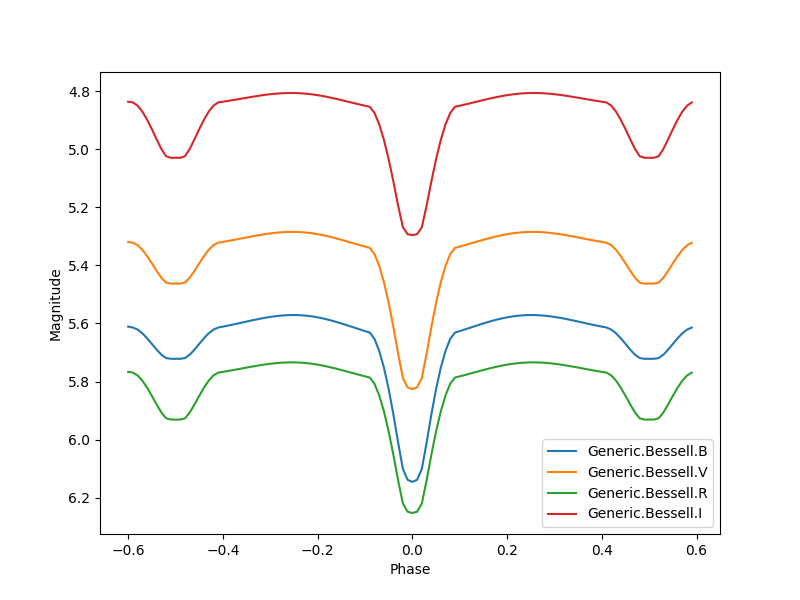

In [8]:
o.plot.phase_curve()